In [3]:
import math
import numpy as np
import time

In [1]:
# Le paramètre noise désigne le péourcentage du nombre de données n que l'on veut bruiter
def generateData(n, noise=0):
    a = np.random.rand(n) * 2 * np.pi
    c1 = (1.5+np.random.rand(n)*2)*np.random.rand(n)*np.vstack((np.cos(a), np.sin(a)))

    b = np.random.rand(n) * 2 * np.pi
    c2 = (3+np.random.rand(n)+np.random.rand(n)*2)*np.vstack((np.cos(b), np.sin(b)))

    x = np.concatenate((c1,c2), axis=1)
    x = np.transpose(x)  
    y = np.concatenate((np.zeros((n)),np.ones((n))),axis=0)
  
    permutation = np.random.permutation(2*n)   
    x = x[permutation]
    y = y[permutation]

    y[0:math.floor(n*noise/100)] = 1 -  y[0:math.floor(n*noise/100)] 

    return x, y

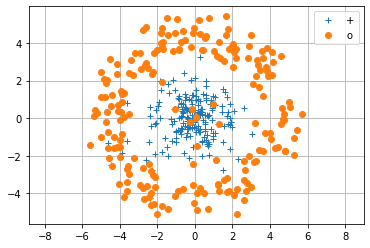

In [5]:
from matplotlib import pyplot as plt
#%matplotlib inline

x, y = generateData(200, noise=10)

plt.plot(x[:,0][np.where(y == 0)], x[:,1][np.where(y == 0)], '+', label='+')
plt.plot(x[:,0][np.where(y == 1)], x[:,1][np.where(y == 1)], 'o', label='o')

plt.axis('equal')
plt.legend()
plt.grid()

In [6]:
def plot_loss(val_loss, train_loss):
    plt.plot(val_loss, color='green', label='Erreur de validation')
    plt.plot(train_loss, color='blue', linestyle='--', label='Erreur d\'entraînement')
    plt.xlabel('Epochs')
    plt.ylim(0, 1)
    plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
    plt.legend()
    plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2)) # input_dim indique la dimension de la couche d'entrée, ici 2 (x1 et x2)
model.add(Dense(1, activation='sigmoid'))

model.summary() # affiche un résumé du modèle

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.03) # On choisit la descente de gradient stochastique, avec un taux d'apprentssage de 0.03

# On définit ici, pour le modèle introduit plus tôt, l'optimiseur choisi, la fonction de perte (ici
# l'entropie croisée car classification binaire) et les métriques que l'on veut observer pendant
# l'entraînement. L'accuracy est le pourcentage de bonnes classifications.
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle avec des mini-batchs de taille 10, sur 200 epochs. 
# Le paramètre validation_split signifie qu'on tire aléatoirement une partie des données
# (ici 20%) pour servir d'ensemble de validation
history = model.fit(x, y, validation_split=0.2, epochs=200, batch_size=10)

l_accuracy: 0.8750
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8258 - val_loss: 0.3735 - val_accuracy: 0.8750
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.8190 - val_loss: 0.3740 - val_accuracy: 0.8750
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8017 - val_loss: 0.3735 - val_accuracy: 0.8750
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5051 - accuracy: 0.7637 - val_loss: 0.3727 - val_accuracy: 0.8750
Epoch 65/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8026 - val_loss: 0.3719 - val_accuracy: 0.8750
Epoch 66/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7922 - val_loss: 0.3721 - val_accuracy: 0.8750
Epoch 67/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7816 - val_loss: 0.3719 - val_accu

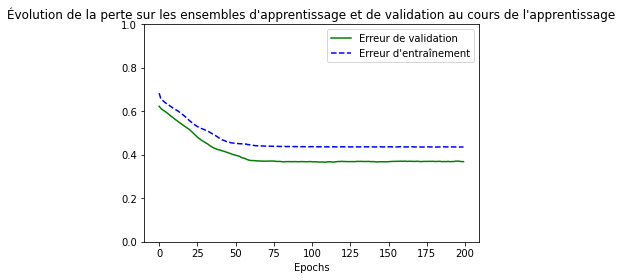

In [9]:
val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
plot_loss(val_loss, train_loss)


In [10]:
x_test, y_test = generateData(100, noise=10)
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7150


[0.5763716697692871, 0.7149999737739563]